In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
train_data=pd.read_csv('Train_Data.csv', sep=',')
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [ ]:
test_data=pd.read_csv('Test_Data.csv', sep=',')
test_data.describe()

,cost,impressions,clicks,conversions
count,318.000000,318.000000,318.000000,318.000000
mean,0.381352,67.144654,29.720126,0.805031
std,0.591480,101.078870,45.200014,1.802480
min,0.000000,1.000000,0.000000,0.000000
25%,0.020000,4.000000,2.000000,0.000000
50%,0.105000,20.000000,9.000000,0.000000
75%,0.490000,103.000000,40.750000,1.000000
max,3.530000,589.000000,276.000000,15.000000


In [ ]:
sub=pd.read_csv('Sample_Submission.csv', sep=',')
sub.mean()

revenue    25.0
dtype: float64

In [ ]:
train_data['CTR']=train_data['clicks']/train_data['conversions']
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,31.5


In [ ]:
test_data['CTR']=test_data['clicks']/test_data['conversions']
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1,49.0
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0,inf
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0,inf
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0,inf
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0,inf


In [ ]:
train_data['CPC']=train_data['cost']/train_data['clicks']
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,inf,0.013333
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,inf,0.010000
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,inf,0.020000
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,31.5,0.010238


In [ ]:
test_data['CPC']=test_data['cost']/test_data['clicks']
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR,CPC
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1,49.0,0.011837
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0,inf,0.014167
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0,inf,0.016667
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0,inf,0.010000
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0,inf,0.010000


In [ ]:
train_data['CPA']=train_data['cost']/train_data['conversions']
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,inf,0.013333,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,NaN,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,inf,0.010000,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,inf,0.020000,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,31.5,0.010238,0.3225


In [ ]:
test_data['CPA']=test_data['cost']/test_data['conversions']
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR,CPC,CPA
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1,49.0,0.011837,0.58
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0,inf,0.014167,inf
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0,inf,0.016667,inf
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0,inf,0.010000,inf
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0,inf,0.010000,inf


In [ ]:
test_data['revenue']=sub['revenue']

In [ ]:
train_data['ROI']=train_data['revenue']/train_data['cost']

In [ ]:
test_data['ROI']=test_data['revenue']/test_data['cost']

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


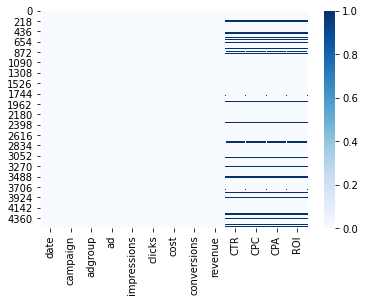

In [ ]:
sns.heatmap(train_data.isnull(), cmap='Blues')

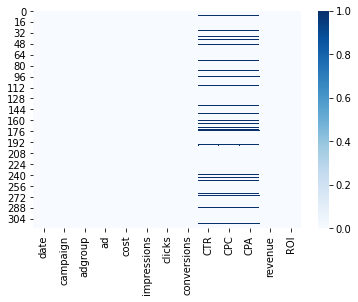

In [ ]:
sns.heatmap(test_data.isnull(), cmap='Blues')

In [ ]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,NaN,0.013333,NaN,0.000000
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,NaN,NaN,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,NaN,0.010000,NaN,0.000000
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,NaN,0.020000,NaN,0.000000
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,31.5,0.010238,0.3225,717.604651


In [ ]:
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR,CPC,CPA,revenue,ROI
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1,49.0,0.011837,0.58,25,43.103448
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0,NaN,0.014167,NaN,25,147.058824
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0,NaN,0.016667,NaN,25,500.000000
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0,NaN,0.010000,NaN,25,2500.000000
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0,NaN,0.010000,NaN,25,2500.000000


In [ ]:
mis=['CPC','CPA','CTR','ROI']


In [ ]:
imputer = SimpleImputer(strategy='mean')



In [ ]:
train_data[mis] = imputer.fit_transform(train_data[mis])

In [ ]:
train_data.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,37.171931,0.013333,1.873793,0.000000
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,37.171931,0.065381,1.873793,169.080644
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,37.171931,0.010000,1.873793,0.000000
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,37.171931,0.020000,1.873793,0.000000
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,31.500000,0.010238,0.322500,717.604651


In [ ]:
test_data[mis] = imputer.fit_transform(test_data[mis])

In [ ]:
cols=['clicks','conversions','cost','impressions','CTR','CPC']


In [ ]:
train_data.describe()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340,37.171931,0.065381,1.873793,169.080644
std,198.349737,100.164913,14.361618,5.223922,1091.742763,19.160178,0.133622,1.819659,821.396478
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.010000,0.010000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,37.171931,0.012000,1.873793,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,37.171931,0.020789,1.873793,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,37.171931,0.065381,1.873793,168.514368
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000,351.000000,3.810000,57.450000,24942.000000


In [ ]:
test_data.describe()

,cost,impressions,clicks,conversions,CTR,CPC,CPA,revenue,ROI
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.0,318.000000
mean,0.381352,67.144654,29.720126,0.805031,39.645545,0.013283,0.512474,25.0,476.035926
std,0.591480,101.078870,45.200014,1.802480,20.745430,0.004069,0.290434,0.0,641.230091
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.010000,0.010000,25.0,7.082153
25%,0.020000,4.000000,2.000000,0.000000,39.645545,0.011341,0.512474,25.0,51.020408
50%,0.105000,20.000000,9.000000,0.000000,39.645545,0.012873,0.512474,25.0,238.636364
75%,0.490000,103.000000,40.750000,1.000000,39.645545,0.014000,0.512474,25.0,500.000000
max,3.530000,589.000000,276.000000,15.000000,236.000000,0.060000,3.360000,25.0,2500.000000


In [ ]:
X_train=train_data[cols]
X_test=test_data[cols]

In [ ]:
y_train=train_data['revenue']
y_test=sub['revenue']

In [ ]:
X_train.shape

(4571, 6)

In [ ]:
X_test.shape

(318, 6)

In [ ]:
model = Sequential()
model.add(Dense(600,input_dim=6, activation= "relu"))
model.add(Dense(200, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=30)

In [ ]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

144.71180056472505
286.9180243953482


In [ ]:
pred

array([[ 1.05301178e+02],
       [-9.41908956e-01],
       [ 8.64282846e-02],
       [-2.61354446e-02],
       [-4.55656052e-02],
       [ 1.81055069e-02],
       [ 1.70960114e+02],
       [-1.65784240e-01],
       [ 1.63992813e+02],
       [ 2.47679710e-01],
       [ 3.69322479e+02],
       [-7.78163552e-01],
       [-6.01655960e-01],
       [ 4.02838043e+02],
       [ 4.72390652e-02],
       [ 1.31478592e+02],
       [-1.00109947e+00],
       [ 1.59535370e+02],
       [-8.43246341e-01],
       [ 1.36600891e+02],
       [-1.55582190e-01],
       [ 3.34408617e+00],
       [ 4.72390652e-02],
       [ 4.63904633e+02],
       [-1.04092836e-01],
       [ 2.78071165e-02],
       [ 5.79949280e+02],
       [ 1.79210815e+02],
       [ 1.28534913e-01],
       [-1.23519540e-01],
       [ 4.77237213e+02],
       [-3.95481825e-01],
       [ 1.13365686e+03],
       [ 2.97268555e+02],
       [ 1.37531128e+02],
       [-3.04491520e-02],
       [ 1.59080505e+02],
       [-1.14803970e+00],
       [-1.2

In [ ]:
res = pd.DataFrame(pred) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["revenue"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>